In [255]:
import pandas as pd
import numpy as np
import seaborn as sns

test = pd.read_csv('/Users/HasanMahdi/Desktop/DataFiles/test.csv', header = 0, dtype={'Age':np.float64})
titanic = pd.read_csv('/Users/HasanMahdi/Desktop/DataFiles/train.csv', header = 0, dtype={'Age': np.float64})
titanic.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


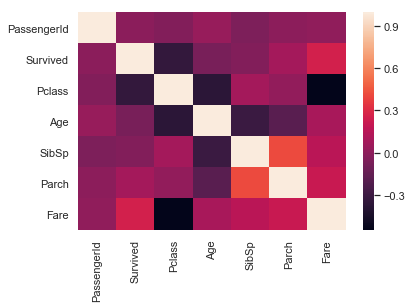

In [256]:
sns.heatmap(data = titanic.corr())

In [257]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [258]:
del titanic['Name']
del titanic['Ticket']
del titanic['Cabin']
del test['Name']
del test['Ticket']
del test['Cabin']
titanic.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [259]:
def getnum(string):
    if string == 'male':
         return 1
    else:
        return 2
test['Gender']=test['Sex'].apply(getnum)
titanic['Gender']=titanic['Sex'].apply(getnum)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [260]:
del titanic['Sex']
del test['Sex']

In [263]:
titanic.isnull().sum()
test.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Gender          0
dtype: int64

In [264]:
MeanS = titanic[titanic.Survived==1].Age.mean()
MeanS

28.343689655172415

In [265]:
titanic["YearsSinceBirth"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1 , MeanS, titanic["Age"])
test["YearsSinceBirth"]=np.where(pd.isnull(test.Age), MeanS, test["Age"])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,YearsSinceBirth
0,1,0,3,22.0,1,0,7.2500,S,1,22.0
1,2,1,1,38.0,1,0,71.2833,C,2,38.0
2,3,1,3,26.0,0,0,7.9250,S,2,26.0
3,4,1,1,35.0,1,0,53.1000,S,2,35.0
4,5,0,3,35.0,0,0,8.0500,S,1,35.0


In [266]:
titanic.isnull().sum()
test.isnull().sum()

PassengerId         0
Pclass              0
Age                86
SibSp               0
Parch               0
Fare                1
Embarked            0
Gender              0
YearsSinceBirth     0
dtype: int64

In [267]:
MeanNS = titanic[titanic.Survived==0].Age.mean()
MeanF = titanic.Fare.mean()
MeanNS

30.62617924528302

In [268]:
titanic.YearsSinceBirth.fillna(MeanNS,inplace=True)
test.Fare.fillna(MeanF,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,YearsSinceBirth
0,1,0,3,22.0,1,0,7.2500,S,1,22.0
1,2,1,1,38.0,1,0,71.2833,C,2,38.0
2,3,1,3,26.0,0,0,7.9250,S,2,26.0
3,4,1,1,35.0,1,0,53.1000,S,2,35.0
4,5,0,3,35.0,0,0,8.0500,S,1,35.0


In [269]:
titanic.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Age                177
SibSp                0
Parch                0
Fare                 0
Embarked             2
Gender               0
YearsSinceBirth      0
dtype: int64

In [270]:
del titanic['Age']
del test['Age']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Gender,YearsSinceBirth
0,1,0,3,1,0,7.2500,S,1,22.0
1,2,1,1,1,0,71.2833,C,2,38.0
2,3,1,3,0,0,7.9250,S,2,26.0
3,4,1,1,1,0,53.1000,S,2,35.0
4,5,0,3,0,0,8.0500,S,1,35.0


In [271]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [272]:
nsurvivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
nsurvivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
nsurvivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(nsurvivedQ)
print(nsurvivedC)
print(nsurvivedS)

47
75
427


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [273]:
titanic.dropna(inplace=True)
test.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Gender,YearsSinceBirth
0,1,0,3,1,0,7.2500,S,1,22.0
1,2,1,1,1,0,71.2833,C,2,38.0
2,3,1,3,0,0,7.9250,S,2,26.0
3,4,1,1,1,0,53.1000,S,2,35.0
4,5,0,3,0,0,8.0500,S,1,35.0


In [274]:
titanic.isnull().sum()


PassengerId        0
Survived           0
Pclass             0
SibSp              0
Parch              0
Fare               0
Embarked           0
Gender             0
YearsSinceBirth    0
dtype: int64

In [275]:
titanic.rename(columns={'YearsSinceBirth':'Age'}, inplace=True)
titanic.rename(columns={'Gender':'Sex'}, inplace=True)
test.rename(columns={'YearsSinceBirth':'Age'}, inplace=True)
test.rename(columns={'Gender':'Sex'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex,Age
0,1,0,3,1,0,7.2500,S,1,22.0
1,2,1,1,1,0,71.2833,C,2,38.0
2,3,1,3,0,0,7.9250,S,2,26.0
3,4,1,1,1,0,53.1000,S,2,35.0
4,5,0,3,0,0,8.0500,S,1,35.0


In [276]:
def getEmb(string):
    if string == 'S':
        return 1
    if string == 'Q':
        return 2
    else:
        return 3

titanic["Embark"]=titanic["Embarked"].apply(getEmb)
del titanic['Embarked']
titanic.rename(columns={'Embark':'Embarked'}, inplace = True)
test["Embark"]=test["Embarked"].apply(getEmb)
del test['Embarked']
test.rename(columns={'Embark':'Embarked'}, inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex,Age,Embarked
0,1,0,3,1,0,7.2500,1,22.0,1
1,2,1,1,1,0,71.2833,2,38.0,3
2,3,1,3,0,0,7.9250,2,26.0,1
3,4,1,1,1,0,53.1000,2,35.0,1
4,5,0,3,0,0,8.0500,1,35.0,1


In [277]:
#We will build a logistic regression model to determine which variables affected survival for passengers.
#We have some independent variables with multiple categorical levels. We will have to create new binary variables
#to effectively use a logistic regression.

def getS(number):
    if number == 1:
        return 1
    else:
        return 0
def getQ(number):
    if number == 2:
        return 1
    else:
        return 0
def getC(number):
    if number == 3:
        return 1
    else:
        return 0

titanic["Cherbourg"]=titanic["Embarked"].apply(getC)
titanic["Queenstown"]=titanic["Embarked"].apply(getQ)
titanic["Southampton"]=titanic["Embarked"].apply(getS)
del titanic['Embarked']

test["Cherbourg"]=test["Embarked"].apply(getC)
test["Queenstown"]=test["Embarked"].apply(getQ)
test["Southampton"]=test["Embarked"].apply(getS)
del test['Embarked']

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex,Age,Cherbourg,Queenstown,Southampton
0,1,0,3,1,0,7.2500,1,22.0,0,0,1
1,2,1,1,1,0,71.2833,2,38.0,1,0,0
2,3,1,3,0,0,7.9250,2,26.0,0,0,1
3,4,1,1,1,0,53.1000,2,35.0,0,0,1
4,5,0,3,0,0,8.0500,1,35.0,0,0,1


In [278]:
#Same idea for Pclass

def getUpper(number):
    if number == 1:
        return 1
    else:
        return 0
def getMiddle(number):
    if number == 2:
        return 1
    else:
        return 0
def getLower(number):
    if number == 3:
        return 1
    else:
        return 0

titanic["UpperClass"]=titanic["Pclass"].apply(getUpper)
titanic["MiddleClass"]=titanic["Pclass"].apply(getMiddle)
titanic["LowerClass"]=titanic["Pclass"].apply(getLower)
del titanic['Pclass']

test["UpperClass"]=test["Pclass"].apply(getUpper)
test["MiddleClass"]=test["Pclass"].apply(getMiddle)
test["LowerClass"]=test["Pclass"].apply(getLower)
del test['Pclass']

titanic.head()

,PassengerId,Survived,SibSp,Parch,Fare,Sex,Age,Cherbourg,Queenstown,Southampton,UpperClass,MiddleClass,LowerClass
0,1,0,1,0,7.2500,1,22.0,0,0,1,0,0,1
1,2,1,1,0,71.2833,2,38.0,1,0,0,1,0,0
2,3,1,0,0,7.9250,2,26.0,0,0,1,0,0,1
3,4,1,1,0,53.1000,2,35.0,0,0,1,1,0,0
4,5,0,0,0,8.0500,1,35.0,0,0,1,0,0,1


In [279]:
#Change Sex to binary variable of whether male or not
def male(num):
    if num==1:
        return 1
    else:
        return 0
titanic['Male']=titanic['Sex'].apply(male)
del titanic['Sex']

test['Male']=test['Sex'].apply(male)
del test['Sex']

titanic.head()

,PassengerId,Survived,SibSp,Parch,Fare,Age,Cherbourg,Queenstown,Southampton,UpperClass,MiddleClass,LowerClass,Male
0,1,0,1,0,7.2500,22.0,0,0,1,0,0,1,1
1,2,1,1,0,71.2833,38.0,1,0,0,1,0,0,0
2,3,1,0,0,7.9250,26.0,0,0,1,0,0,1,0
3,4,1,1,0,53.1000,35.0,0,0,1,1,0,0,0
4,5,0,0,0,8.0500,35.0,0,0,1,0,0,1,1


In [280]:
#SibSP and Parch are very similiar variables, so to avoid multicollinearity, I will combine them into one binary variable.
titanic['TravelAlone']=np.where((titanic["SibSp"]+titanic["Parch"])>0, 0, 1)
del titanic['SibSp']
del titanic['Parch']

test['TravelAlone']=np.where((test["SibSp"]+test["Parch"])>0, 0, 1)
del test['SibSp']
del test['Parch']

In [281]:
titanic.head()

,PassengerId,Survived,Fare,Age,Cherbourg,Queenstown,Southampton,UpperClass,MiddleClass,LowerClass,Male,TravelAlone
0,1,0,7.2500,22.0,0,0,1,0,0,1,1,0
1,2,1,71.2833,38.0,1,0,0,1,0,0,0,0
2,3,1,7.9250,26.0,0,0,1,0,0,1,0,1
3,4,1,53.1000,35.0,0,0,1,1,0,0,0,0
4,5,0,8.0500,35.0,0,0,1,0,0,1,1,1


In [282]:
titanic['Survived'].value_counts()
#No need to oversample dependent variable. Pretty close.

0    549
1    340
Name: Survived, dtype: int64

In [283]:
titanic.groupby('Survived').mean()
#From an initial screening, we can see that a higher percent of upperclass passengers survived vs. lowerclass.
#Males tend to survive less.
#Survivors are younger, probably b/c children boarded the life boats first. I'll add a variable 'Minor'

,PassengerId,Fare,Age,Cherbourg,Queenstown,Southampton,UpperClass,MiddleClass,LowerClass,Male,TravelAlone
Survived,,,,,,,,,,,
0,447.016393,22.117887,30.626179,0.136612,0.085610,0.777778,0.145719,0.176685,0.677596,0.852459,0.681239
1,444.358824,48.209498,28.216300,0.273529,0.088235,0.638235,0.394118,0.255882,0.350000,0.320588,0.473529


In [284]:
def minor(num):
    if num <= 17:
        return 1
    else:
        return 0
titanic['Minor']= titanic['Age'].apply(minor)

test['Minor']= test['Age'].apply(minor)

titanic.head()

,PassengerId,Survived,Fare,Age,Cherbourg,Queenstown,Southampton,UpperClass,MiddleClass,LowerClass,Male,TravelAlone,Minor
0,1,0,7.2500,22.0,0,0,1,0,0,1,1,0,0
1,2,1,71.2833,38.0,1,0,0,1,0,0,0,0,0
2,3,1,7.9250,26.0,0,0,1,0,0,1,0,1,0
3,4,1,53.1000,35.0,0,0,1,1,0,0,0,0,0
4,5,0,8.0500,35.0,0,0,1,0,0,1,1,1,0


In [285]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

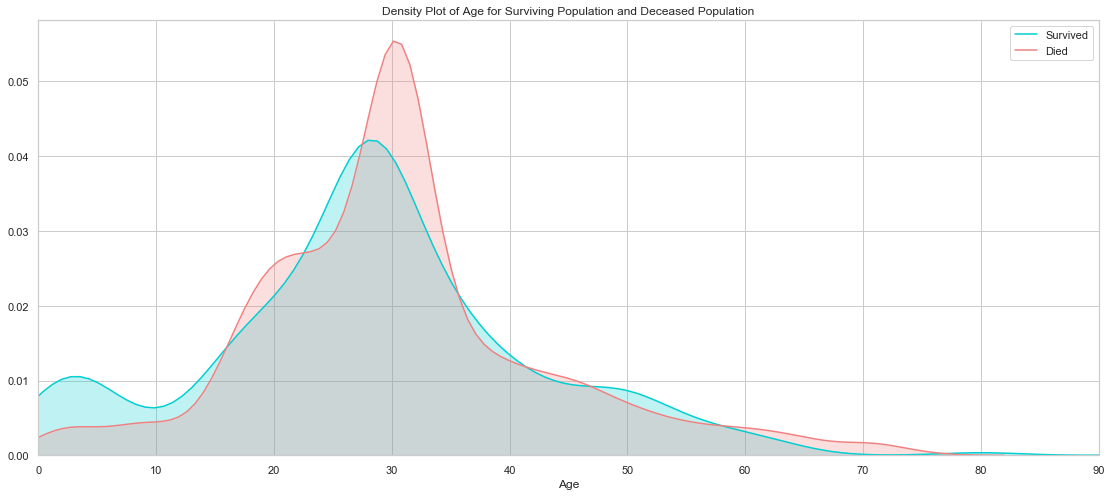

In [286]:
plt.figure(figsize=(19,8))
ax = sns.kdeplot(titanic["Age"][titanic.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic["Age"][titanic.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(0,90)
plt.show()
#Shows distributions of age for survived vs not survived

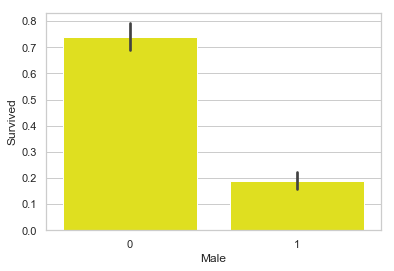

In [287]:
sns.barplot('Male', 'Survived', data=titanic, color='Yellow')
plt.show()
#Unsurprisingly, more females survived.

In [288]:
#Now we need the testing set to be in the same form as the training data!
#I went back and ran the test set through the same transformations.

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#We will now fit the logistic regression!

variables = ['Age', 'Cherbourg', 'Male', 'Southampton', "Queenstown", 'UpperClass', 'MiddleClass', 'LowerClass', 'TravelAlone', 'Minor','Fare']


model=LogisticRegression()

xTrain = titanic[variables]
xTest = test[variables]
yTrain = titanic['Survived']


print(xTrain.shape, yTrain.shape)
print(xTest.shape)

(889, 11) (889,)
(418, 11)


In [290]:
model.fit(xTrain, yTrain)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [291]:
y_pred = model.predict(xTest)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [292]:
y_pred.size

418

In [293]:
PassID = test['PassengerId']
PassID.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [294]:
predic = pd.DataFrame(data = y_pred, columns = ['Survived'])
predic.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [295]:
submission = pd.concat([PassID,predic], axis = 1)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [296]:
submission.to_csv('/Users/HasanMahdi/Desktop/DataFiles/TitanicSubmission.csv', index = False)